In [1]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import yfinance as yf
import json
import bz2
from dataloader import *
from finance import *
%load_ext autoreload
%autoreload 2

/Users/raphaelattias/Documents/GitHub/ada-2021-project-the-panda-riders/dataloader.py:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (keywords != [""] and speakers !=  [""], "The keywords and speakers are empty lists, nothing to filter.")


In [2]:
# Cellule pour importer les questions qu'on aura fait individuellement, et sera supprimée à la fin.

from section1 import *
from finance import applestock
from quotebankexploration import *

In [4]:
quotes = load_quotes(r"data/quotes-2018.json.bz2", limit = 1000, columns = ["quoteID", "speaker","date"])

## Quotebank Data Exploration

In [5]:
quotebank_exploration(quotes)

Let's see what the dataset looks like and what is it's shape.


quoteID         speaker                 date
0  2018-06-30-000005  Marcus Eriksen  2018-06-30 07:00:00
1  2018-12-06-000021     James Marsh  2018-12-06 12:00:34
2  2018-04-25-000107            None  2018-04-25 03:48:37
3  2018-06-28-000032            None  2018-06-28 04:01:03
4  2018-09-15-000010            None  2018-09-15 00:05:14

(1000, 3)

The dataset comprises the following columns : 
 * `quoteID`: Primary key of the quotation (format: "YYYY-MM-DD-{increasing int:06d}").
 * `quotation`: Text of the longest encountered original form of the quotation.
 * `speaker`: Selected most likely speaker. This matches the first speaker entry in `probas`. If none of the speakers is selected, the speaker is defined as "None".
 * `qids`: Wikidata IDs of all aliases that match the selected speaker. If no Wikidata IDs is found, the value is '[]'.
 * `date`: Earliest occurrence date of any version of the quotation.
 * `numOccurrences`: Number of time this quotation occurs in the articles.
 * `probas`: Array representing the probabilities of each speaker having uttered the quotation.
 * `urls`: List of links to the original articles containing the quotation. 
 * `phase`: Corresponding phase of the data in which the quotation first occurred (A-E).

## Quotebank Data Pre-processing

In [9]:
obama_quotes = filter_quotes(r"data/quotes-2008.json.bz2", speakers = ['obama'], keywords=["yes we can"], chunknum = 1000, save="obama_quotes")

Chunks filtered:   0%|          | 0/1000 [00:00<?, ?chunk/s]

INFO: 1000000 quotes will be inspected


# Stock
This is an example

We first load the dataset
          Date       Open       High        Low      Close     Volume  \
0   2018-12-31  38.474335  38.675772  37.976811  38.282608  140014000   
1   2019-01-02  37.590930  38.552002  37.430751  38.326294  148158800   
2   2019-01-03  34.943134  35.365424  34.462600  34.508713  365248800   
3   2019-01-04  35.076612  36.052245  34.899446  35.981861  234428400   
4   2019-01-07  36.088651  36.120203  35.409106  35.901775  219111200   
..         ...        ...        ...        ...        ...        ...   
247 2019-12-23  69.105997  70.022385  69.066582  69.960800   98572000   
248 2019-12-24  70.130764  70.180036  69.694744  70.027298   48478800   
249 2019-12-26  70.162805  71.433925  70.133246  71.416679   93121200   
250 2019-12-27  71.714744  72.416817  70.975721  71.389572  146266000   
251 2019-12-30  71.305824  72.101508  70.261341  71.813286  144114400   

     Dividends  Stock Splits  
0          0.0             0  
1          0.0             0  
2   

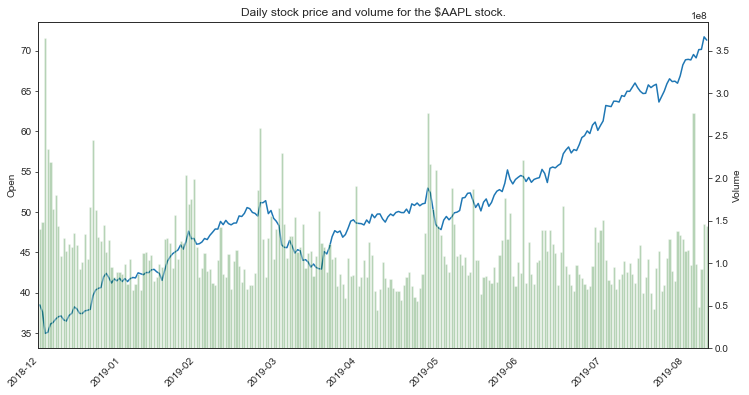

We can also observe the distribution of the volume and daily price difference between    Open and Closing of the market.


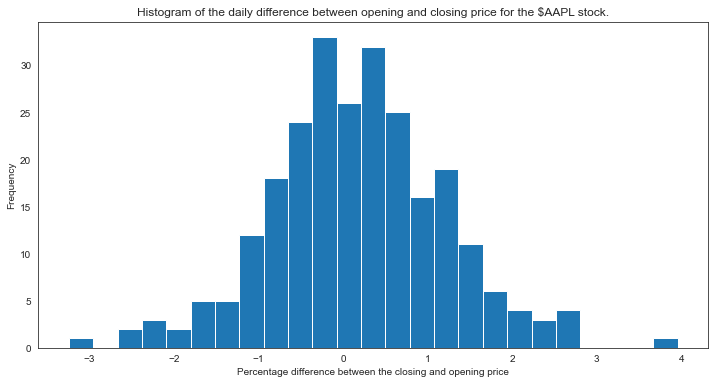

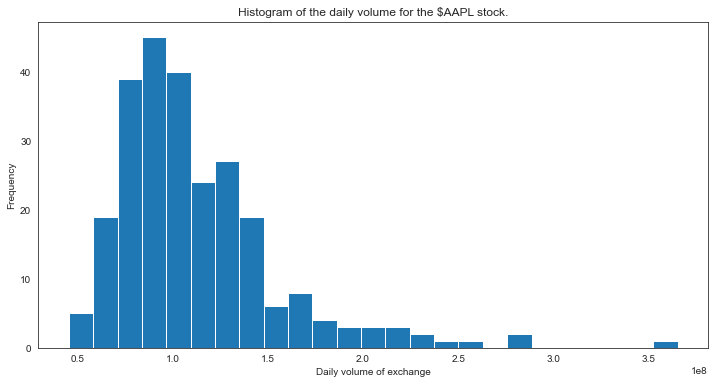

In [14]:
applestock()

In [14]:
keywords_1_word = ["apple", "iphone", "ipad", "imac", "ipod", "macbook", "mac", "airpods", \
        "lightening", "magsafe", "aapl", "iwatch", "itunes", "homepod", "macos", "ios", "ipados", \
        "watchos", "tvos", "wwdc", "siri", "facetime", "appstore", "icloud", "iphones"]

keywords_2_words = ["apple watch", "steve jobs", "tim cook", "face id", \
        "pro display xdr", "katherine adams", "eddy cue", "craig federighi"]

keywords = {"One word": keywords_1_word, "Two words": keywords_2_words}

speakers = ["steve jobs", "tim cook", "katherine adams", "eddy cue", "craig federighi", "john giannandrea", "greg joswiak", \
    "sabih khan", "luca maestri", "deirdre o'brien", "johny srouji", "john ternus", "jeff williams", "lisa jakson", \
    "stella low", "isabel ge mahe", "tor myhren", "adrian perica", "phil schiller", "arthur levinson", "james bell", \
    "albert gore", "andrea jung", "monica lozano", "ronald sugar", "susan wagner"]
    

In [18]:

years_gas = range(2008, 2014)
years_raph = range(2014, 2021)

for year in years_raph:
    filter_quotes(f"data/quotes-{str(year)}.json.bz2", speakers = speakers, keywords = keywords, save = f"filtered_quotes_{str(year)}", chunksize=100000)

0it [00:00, ?it/s]